In [219]:
import pandas as pd
data = pd.read_csv('wine_cleared.csv')
display(data.head(2))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


### РАЗБОР ЧИСЛОВЫХ ВЕЛИЧИН

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену 35.363389$ в 35$, избавив данные от лишней информации.

In [220]:
# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)
display(data.head(2))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15


### РАЗБОР ТЕКСТА

Синтаксис регулярных выражений необычен и содержит различные символы, знаки препинания, математических операций и так далее. Подробнее ознакомиться с синтаксисом регулярных выражений поможет статья [Python RegEx: практическое применение регулярок](https://tproger.ru/translations/regular-expression-python/)

Реализация такого механизма существует в pandas в работе со строками. Для того чтобы найти все числа в каждом значении серии, воспользуемся методом str.findall(). Метод возвращает все совпадения с заданным шаблоном в серии pandas. 

In [221]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)
display(data.head(2))

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Фёдор\AppData\Local\Temp\ipykernel_21644\1728837896.py:1: SyntaxWarning: invalid escape sequence '\d'
  regex = '\d{4}' # регулярное выражение для нахождения чисел


,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011


Разберём регулярное выражение \d{4}:

\d — класс символов, обозначает соответствие цифрам в диапазоне цифр [0-9];
{4} в шаблоне означает искать четыре вхождения символа, указанного ранее. В нашем случае это будут четырехзначные числа.
Таким образом, \d{4} означает поиск четырехзначных чисел в заданной строке.

Проверить, насколько точно работает ваше регулярное выражение, а также найти реализацию популярных регулярных выражений (например, поиска номера телефона), вы сможете на сайте https://ihateregex.io

### РАЗБОР КАТЕГОРИЙ

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

In [222]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

Выберите из списка две самых популярных (помимо США) страны, производящих вино.

In [223]:
counts = data['country'].value_counts()
display(counts.head(3))

country
US        54504
France    22093
Italy     19540
Name: count, dtype: int64

Создайте бинарные признаки is_france, is_italy наподобие признака is_usa.

In [224]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)
display(data.head(3))
display(data['is_france'].sum(), data['is_italy'].sum())

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1,0,0


22093

19540

Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.

In [225]:
# преобразуем признак year в объект datetime для удобного сравнения дат
data['year'] = pd.to_datetime(data['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
data['old_wine'].sum()

39765

Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.

Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

Ответом на это задание является получившееся регулярное выражение и код преобразования.

In [226]:
regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)
display(data.head(3))

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\Фёдор\AppData\Local\Temp\ipykernel_21644\329091222.py:1: SyntaxWarning: invalid escape sequence '\('
  regex = '\((.*?)\)'


,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley


## 3. Создание признаков. Внешние источники данных

### РАБОТА С ФАЙЛАМИ

In [227]:
import pandas as pd
country_population = pd.read_csv('country_population.csv', sep=';')

country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


Каково население Италии согласно датасету country_population? Ответ вводите без пробелов и запятых.

In [228]:
# Находим количество населения Италии
italy_population = country_population.loc[country_population['country'] == 'Italy', 'population'].values[0]

print(f"Население Италии: {italy_population}")

Население Италии: 59,097,904


Далее сопоставим значения из датасета country_population и страной-производителем вина. На основе значений населения из country_population заполним новый признак country_population.

In [229]:
data.join(country_population.set_index('country'), on='country')
#display(data.head(3))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892"
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386"
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,Riesling,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386"
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Noir,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013-01-01,0,0,0,0,Erben Müller-Burggraef,"83,129,285"
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,Pinot Noir,Citation,75,2004-01-01,1,0,0,1,Oregon,"333,022,386"
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Gewürztraminer,Domaine Gresser,30,2013-01-01,0,1,0,0,Alsace,"68,035,000"
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Pinot Gris,Domaine Marcel Deiss,32,2012-01-01,0,1,0,0,Alsace,"68,035,000"


Теперь используем файл country_area.zip (необходимо распаковать) для информации о площади страны.

In [230]:
country_area = pd.read_csv('country_area.csv', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


Создайте новый признак area_country — площадь страны, аналогичный признаку population.

Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'? Ответ вводите без пробелов, округлите до целых.

In [231]:
df = data.join(country_area.set_index('country'), on='country')
df.loc[df['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))', 'area'].values[0]
#print(f"Население Италии: {wine_found}")

9372610.0

## 4. Создание признаков. Работа с форматом «дата-время»

In [232]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка.

In [233]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection.

In [234]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

Создайте новый признак is_connection — факт соединения с клиентом. Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.

In [235]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls['is_connection'].sum()

7

Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.

In [236]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

Итак, мы получили четыре новых признака для нашего набора данных: duration, time_connection, is_connection, time_diff. После генерации признаков из дат исходные признаки agent_date, created_at, end_date нам больше не нужны — передать на вход модели мы им не сможем, так как большинство моделей машинного обучения умеют работать только с числами, даты и текст ей недоступны, поэтому удалим их:

In [237]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

In [238]:
data['year'] = pd.to_datetime(data['year'], errors = 'coerce')
data['years_diff'] = pd.to_datetime("2022-01-12") - data['year']
data['years_diff'].max()

Timedelta('98627 days 00:00:00')

## 5. Кодирование признаков. Методы

Ниже мы рассмотрим методы кодирования, обозначенные в блок-схеме. Для кодирования категориальных признаков мы будем использовать библиотеку category_encoders. Это удобная библиотека для кодирования категориальных переменных различными методами.

In [239]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [240]:
import category_encoders as ce

Рассмотрим следующие популярные способы кодирования: 

- порядковое кодирование (Ordinal Encoding); 

- однократное кодирование (OneHot Encoding); 

- бинарное кодирование (Binary Encoding).

Создадим обучающий набор для кодирования порядковых признаков — ассортимент небольшого магазина с одеждой, где size — буквенное обозначение размера одежды, type — тип изделия.

In [241]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


### ПОРЯДКОВОЕ КОДИРОВАНИЕ. ORDINAL ENCODING

Метод fit_transform устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. 

Затем используем метод concat() для добавления закодированного признака в датафрейм data.

In [242]:
# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


Используйте ранее изученные методы кодирования и закодируйте признак year в датасете винных обзоров порядковым кодированием.

In [243]:
# создаем объект порядкового кодировщика OrdinalEncoder
ord_encoder = ce.OrdinalEncoder()
# проводим преобразование кодируемого признака
year_col = ord_encoder.fit_transform(data['year'])
# добавляем результат к исходному DataFrame
data = pd.concat([data, year_col], axis=1)
# выводим на дисплей
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,Nicosia,35,2013-01-01,0,0,1,0,Etna,3298 days,2013-01-01
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,4029 days,2011-01-01
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,3298 days,2013-01-01


### ОДНОКРАТНОЕ КОДИРОВАНИЕ. ONE-HOT ENCODING

Закодируем признак type в Python. Используем класс OneHotEncoding библиотеки category_encoders. 

Укажем в cols наименование признака type для кодировки, иначе будут закодированы все строковые столбцы.

In [244]:
import category_encoders as ce # импорт для работы с кодировщиком

In [245]:
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


На самом деле метод однократного кодирования реализован в pandas в функции pd.get_dummies(). 

Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, для которых должно выполняться кодирование. 

По умолчанию кодирование выполняется для всех столбцов типа object:

In [246]:
clothing_dummies = pd.get_dummies(clothing, columns=['type'])
clothing_dummies

,size,size,type_dress,type_skirt,type_shirt,type_coat,type_coat,type_dress,type_shirt,type_skirt
0,xxs,1,1,0,0,0,False,True,False,False
1,xxs,1,0,1,0,0,False,False,False,True
2,xs,2,1,0,0,0,False,True,False,False
3,s,3,0,1,0,0,False,False,False,True
4,m,4,1,0,0,0,False,True,False,False
5,l,5,0,0,1,0,False,False,True,False
6,s,3,0,0,0,1,True,False,False,False
7,m,4,0,0,0,1,True,False,False,False
8,xxl,6,0,0,1,0,False,False,True,False
9,l,5,1,0,0,0,False,True,False,False


В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя One-Hot Encoding.

In [247]:
encoder = ce.OneHotEncoder(cols=['taster_name'])
type_bin = encoder.fit_transform(data['taster_name'])
data_testers = pd.concat([data, type_bin], axis=1)

data_testers.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_11,taster_name_12,taster_name_13,taster_name_14,taster_name_15,taster_name_16,taster_name_17,taster_name_18,taster_name_19,taster_name_20
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0


In [248]:
taster_dummies = pd.get_dummies(data, columns=['taster_name'])
taster_dummies.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_twitter_handle,title,...,taster_name_Lauren Buzzeo,taster_name_Matt Kettmann,taster_name_Michael Schachner,taster_name_Mike DeSimone,taster_name_Paul Gregutt,taster_name_Roger Voss,taster_name_Sean P. Sullivan,taster_name_Susan Kostrzewa,taster_name_Virginie Boone,taster_name_unknown
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,False,False,False,False,False,False,False,False,False,False
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,False,False,False,False,False,True,False,False,False,False
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,False,False,False,False,True,False,False,False,False,False


### ДВОИЧНОЕ КОДИРОВАНИЕ

1. Сначала признак кодируется в числовое представление, как мы делали это при кодировании порядковых признаков: hot — 1, cold — 2, … и так далее.

2. Затем каждое числовое представление, выраженное целым числом, переводится в двоичный код: 1 – 001, 2 – 010, 3 – 011,... и так далее.

3. Затем для каждого двоичного представления создаются новые признаки. В нашем случае двоичное представления уместилось в три числа, поэтому итогом стало создание трёх новых признаков.

Вернёмся к примеру с магазином одежды. Закодируем бинарным способом признак type в Python. Используем класс BinaryEncoder библиотеки category_encoders.

In [249]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


Закодируйте признак country двоичным способом.

In [250]:
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
data_countries = pd.concat([data, type_bin], axis=1)

data_countries.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,old_wine,locality,years_diff,year,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,Etna,3298 days,2013-01-01,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,Douro,4029 days,2011-01-01,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,Willamette Valley,3298 days,2013-01-01,0,0,0,0,1,1


Методы, рассмотренные в модуле, популярны и очень часто используются в кодировании данных за счёт своей простоты, понятности и лёгкости в реализации. Про другие, менее популярные способы кодирования вы можете прочитать в документации к используемой нами библиотеке [category_encoders](https://contrib.scikit-learn.org/category_encoders/).

На основе изученного материала определите подходящий способ кодирования признака taster_twitter_handle из датасета винных обзоров и закодируйте его.

In [251]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
data_handle = pd.concat([data, type_bin], axis=1)

data_handle.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,is_italy,old_wine,locality,years_diff,year,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,1,0,Etna,3298 days,2013-01-01,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,Douro,4029 days,2011-01-01,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,Willamette Valley,3298 days,2013-01-01,0,0,0,1,1


Определите типы признаков и закодируйте их в соответствии с изученными способами.

In [252]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [253]:
df_dummies = pd.get_dummies(df, columns=['product'])
df_dummies = pd.get_dummies(df, columns=['payment_type'])
df_dummies.head(3)

,product,price,payment_type_Amex,payment_type_Mastercard,payment_type_Visa
0,Product1,1200,False,True,False
1,Product2,3600,False,False,True
2,Product3,7500,True,False,False


## 6. Преобразование признаков. Нормализация. Стандартизация

### НОРМАЛИЗАЦИЯ

Нормализация — один из методов преобразования входных признаков, при котором значения признаков приводятся к неким безразмерным единицам в рамках заданного диапазона (например, [0,...,1] или [-1,...,1]) либо с каким-то заданным свойством (например, стандартным отклонением, равным 1).

In [254]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

Сгенерированные распределения выбраны случайным образом, однако вы можете встретить их, например, в таких наборах данных:

- Бета-распределение моделирует вероятность. Например, коэффициент конверсии клиентов, купивших что-то на сайте.

- Экспоненциальное распределение, предсказывающее периоды времени между событиями. Например, время ожидания автобуса.

- Нормальное распределение, например распределение роста и веса человека.

Рассмотрим распределения на графике. Метод визуализации kdeplot() — это метод визуализации распределения наблюдений в наборе данных. Он представляет собой непрерывную линию плотности вероятности. Подробнее об этой функции вы можете прочитать в [руководстве](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde).

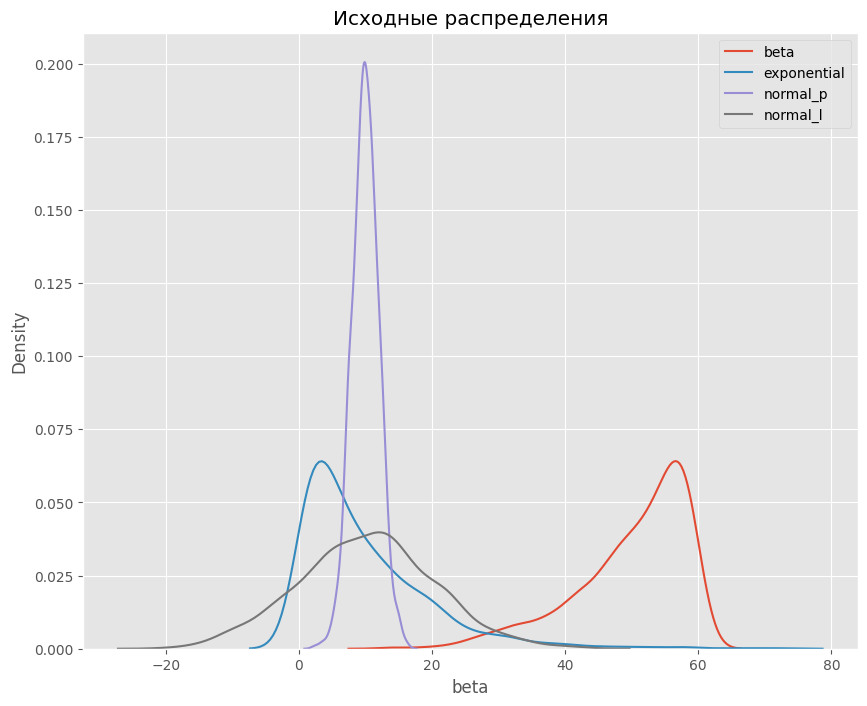

In [255]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [256]:
# Зафиксируем описательные статистики до преобразований.
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


MINMAXSCALER

Класс MinMaxScaler делает вышеописанную нормализацию автоматически при помощи функции преобразования fit_transform. Вы познакомитесь с ней подробнее в модулях машинного обучения.

<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

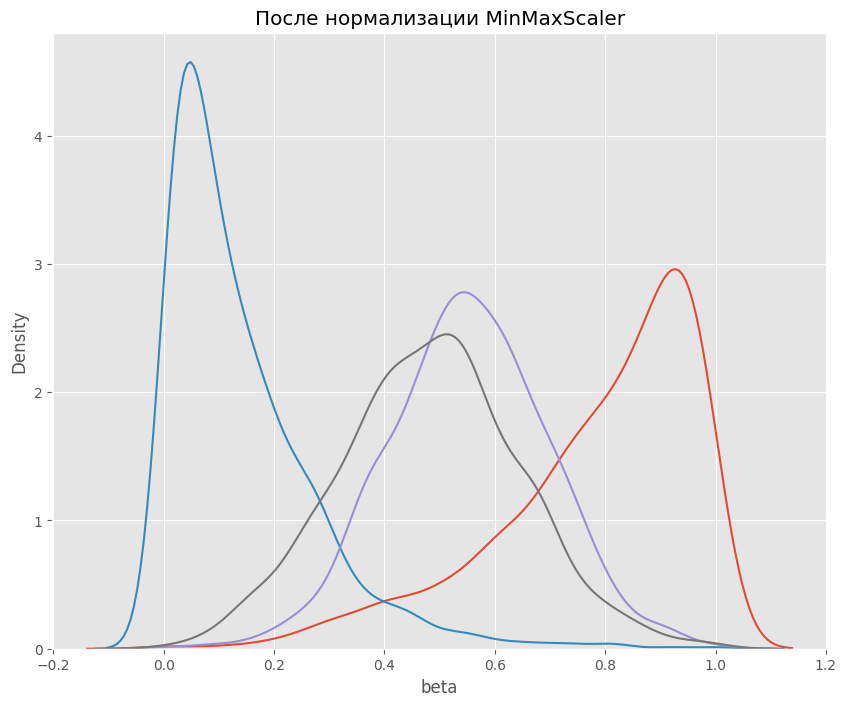

In [257]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

Как мы видим, значения расположились в диапазоне от минимального 0 до максимального 1, как и должно произойти при таком способе нормализации. Также сохранилась форма исходного распределения: скошенные влево/вправо распределения сохранили свою форму.

 ROBUSTSCALER

<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

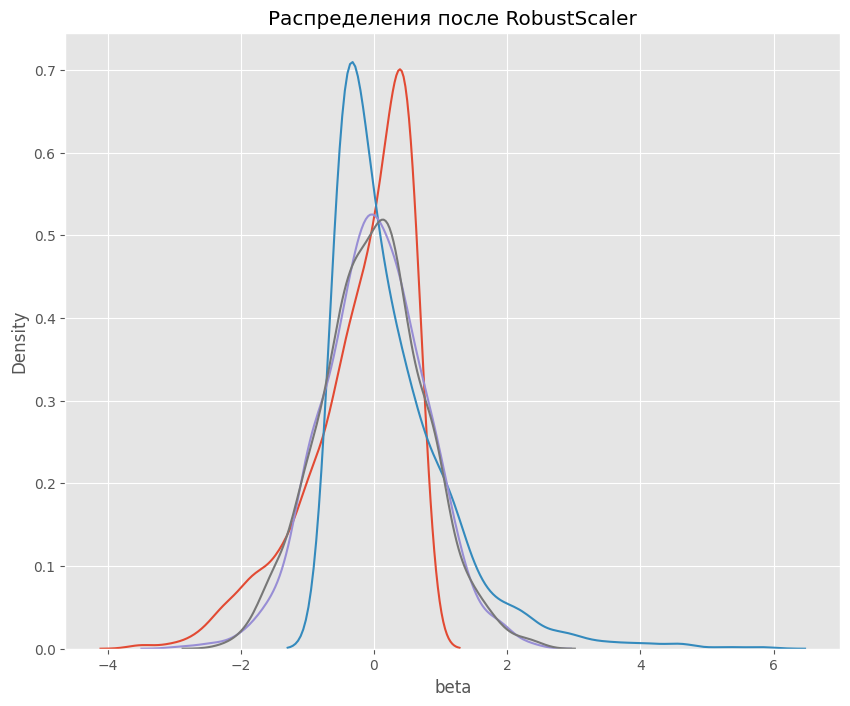

In [258]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

Из описательных статистик видно, что RobustScaler не масштабирует данные в заданный интервал, как делает это MinMaxScaler. Однако распределения не сохранили своё исходное состояние. Левый хвост экспоненциального распределения стал практически незаметным. То же произошло и с бета-распределением. Они стали более нормальными.

Поскольку MinMaxScaler использует в своём вычислении минимальное и максимальное значения признака, то этот способ будет чувствителен к наличию выбросов в распределении.

RobustScaler в вычислении использует перцентили, и поэтому не зависит даже от большого количества выбросов.

Больше о других способах нормализации и их сравнении вы можете прочитать в официальном руководстве [scikit-learn](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

### СТАНДАРТИЗАЦИЯ 

ДЛЯ ЧЕГО НЕОБХОДИМО ТАКОЕ ПРЕОБРАЗОВАНИЕ?

Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.

Cтандартизируем признаки в исходном наборе данных.

STANDARDSCALER

Для стандартизации используем класс StandardScaler.

<Axes: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

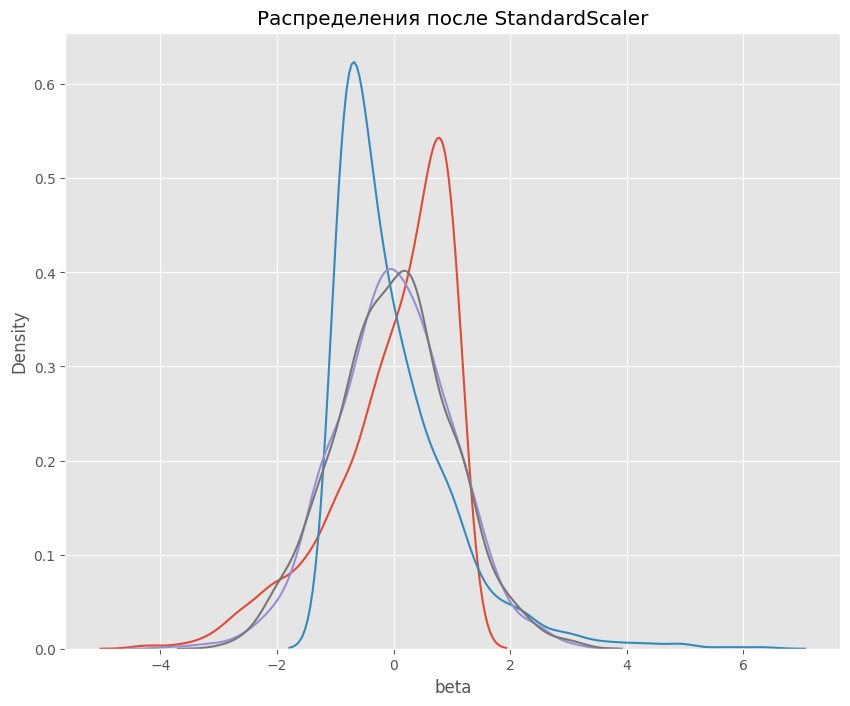

In [259]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

Стандартное отклонение стало равным 1, а средние значения — 0. Распределения изменились подобно RobustScaler — стали более нормальными.

НОРМАЛИЗОВАТЬ ИЛИ СТАНДАРТИЗИРОВАТЬ?

Однако мы составили небольшую инструкцию по преобразованию признаков:

- если признак распределён нормально, то его необходимо стандартизировать;
- если признак распределён ненормально, его необходимо нормализовать;
- если разброс значений небольшой, то можно обойтись без преобразования данных.

Нормализуйте признак price. Выберите подходящий тип нормализации, учитывая тот факт, что в данных присутствуют вина с выбросной стоимостью.

В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.

In [260]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
# кодируем исходный датасет
df_r = r_scaler.fit_transform(data[['price']], y=None)
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=['price'])

df_r['price'].sum()

43501.229482424984

Стандартизируйте исходный признак price.

In [261]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(data[['price']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=['price'])

df_s['price'][129968]

-0.13551812448719314

## 7. Отбор признаков. Мультиколлинеарность

ДЛЯ ЧЕГО НЕОБХОДИМО ОТБИРАТЬ ПРИЗНАКИ?

1. Сократить время обучения. Чем меньше данных, тем быстрее обучается модель. Например, в скоринговых моделях часто количество признаков на этапе проектирования составляет больше 500, и дата-сайентисты делают отбор признаков, чтобы исключить те признаки, которые вносят наименьший вклад. В редких случаях количество признаков в модели может быть больше 100.

2. Повысить качество предсказания. Избыточные данные могут снижать точность предсказания, могут выступать в качестве «шума». Это явление называют мультиколлинеарностью, которую мы изучим ниже. Мы уже говорили о «проклятии размерности» в юните Работа с пропусками: методы обработки.

In [262]:
import pandas as pd

iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.

<Axes: >

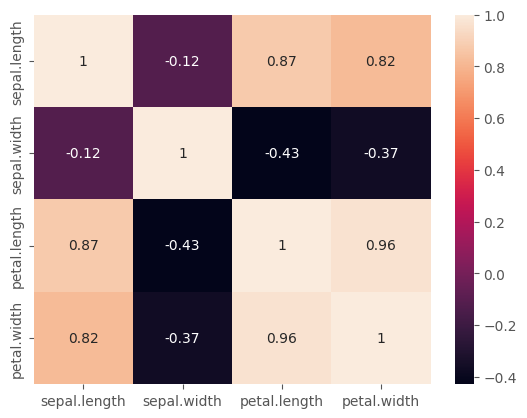

In [263]:
# импортируем seaborn для построения графиков
import seaborn as sns

# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

In [264]:
iris = iris.drop(['petal.width'], axis=1)
iris = iris.drop(['petal.length'], axis=1)
iris.head()

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


У нас осталось всего два признака с коэффициентом корреляции -0.12: sepal.width и sepal.length, и признак, который необходимо предсказать — variety. Связь между оставшимися признаками очень слабая, поэтому эти признаки будут включены в итоговый набор данных для обучения.

Таким образом, анализ мультиколлинеарности и исключение сильно скоррелированных признаков помогает отобрать признаки для модели, уменьшить количество признаков, исключить повторяющуюся информацию.

КАКОЙ ПРИЗНАК УДАЛЯТЬ?

Вы можете удалить любой признак из пары. Однако вы можете оставить в наборе данных тот признак, который легче будет использовать в дальнейшем. Например, для него не понадобится округление или нормализация. 

<Axes: >

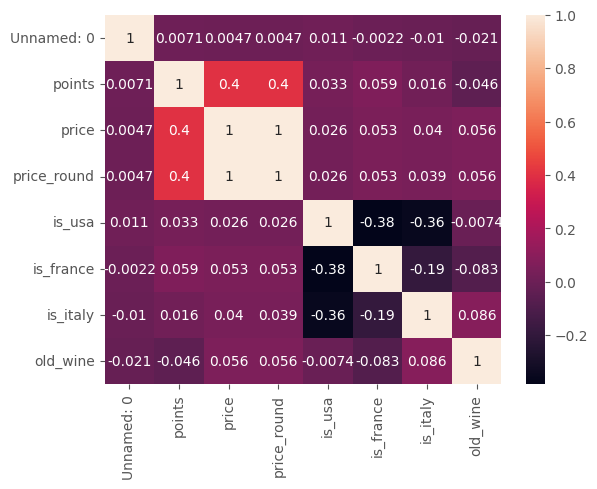

In [265]:
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(data.corr(numeric_only=True), annot=True)

Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.

In [266]:
data_droped = data.drop(['price'], axis=1)
data_droped.head()

,Unnamed: 0,country,description,designation,points,province,region_1,taster_name,taster_twitter_handle,title,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,Nicosia,35,2013-01-01,0,0,1,0,Etna,3298 days,2013-01-01
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,4029 days,2011-01-01
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,3298 days,2013-01-01
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,3298 days,2013-01-01
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,3664 days,2012-01-01


<Axes: >

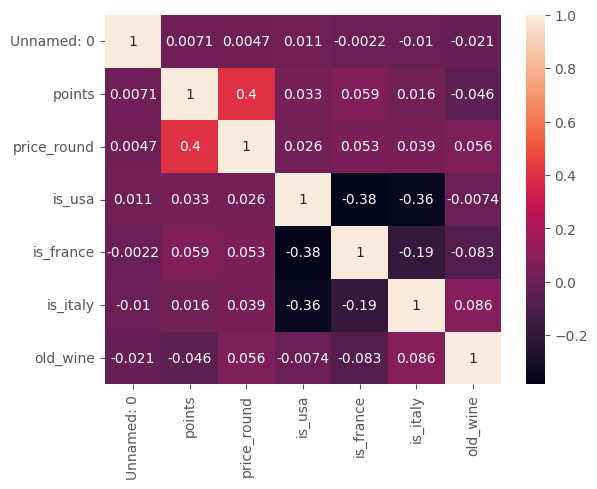

In [273]:
sns.heatmap(data_droped.corr(numeric_only=True), annot=True)